In [43]:
import pandas as pd
import re
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error


In [44]:
data = pd.read_csv("../data/ml_gw_car_insurance.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97655 entries, 0 to 97654
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        97655 non-null  int64  
 1   policy_id                         97655 non-null  object 
 2   policy_tenure                     97655 non-null  float64
 3   age_of_car                        97655 non-null  float64
 4   age_of_policyholder               97655 non-null  float64
 5   area_cluster                      97655 non-null  object 
 6   population_density                97655 non-null  int64  
 7   make                              97655 non-null  int64  
 8   segment                           97655 non-null  object 
 9   model                             97655 non-null  object 
 10  fuel_type                         97655 non-null  object 
 11  max_torque                        97655 non-null  object 
 12  max_

## Max Torque and Max Power (Only Numbers)


In [45]:
data["max_torque"].unique()

array(['60Nm@3500rpm', '113Nm@4400rpm', '91Nm@4250rpm', '250Nm@2750rpm',
       '200Nm@3000rpm', '82.1Nm@3400rpm', '200Nm@1750rpm', '85Nm@3000rpm',
       '170Nm@4000rpm'], dtype=object)

In [46]:
data['torque_Nm'] = data['max_torque'].str.extract('(\d+)').astype(float)
data['torque_rpm'] = data['max_torque'].str.extract('@(\d+)').astype(float)

data[["max_torque", "torque_Nm", "torque_rpm"]]

,max_torque,torque_Nm,torque_rpm
0,60Nm@3500rpm,60.0,3500.0
1,60Nm@3500rpm,60.0,3500.0
2,60Nm@3500rpm,60.0,3500.0
3,113Nm@4400rpm,113.0,4400.0
4,91Nm@4250rpm,91.0,4250.0
...,...,...,...
97650,113Nm@4400rpm,113.0,4400.0
97651,250Nm@2750rpm,250.0,2750.0
97652,113Nm@4400rpm,113.0,4400.0
97653,113Nm@4400rpm,113.0,4400.0


In [47]:
data["max_power"].unique()

array(['40.36bhp@6000rpm', '88.50bhp@6000rpm', '67.06bhp@5500rpm',
       '113.45bhp@4000rpm', '88.77bhp@4000rpm', '55.92bhp@5300rpm',
       '97.89bhp@3600rpm', '61.68bhp@6000rpm', '118.36bhp@5500rpm'],
      dtype=object)

In [48]:
data['power_bhp'] = data['max_power'].str.extract('(\d+.\d+)').astype(float)
data['power_rpm'] = data['max_power'].str.extract('@(\d+)').astype(float)

data[["max_power", "power_bhp", "power_rpm"]]

,max_power,power_bhp,power_rpm
0,40.36bhp@6000rpm,40.36,6000.0
1,40.36bhp@6000rpm,40.36,6000.0
2,40.36bhp@6000rpm,40.36,6000.0
3,88.50bhp@6000rpm,88.50,6000.0
4,67.06bhp@5500rpm,67.06,5500.0
...,...,...,...
97650,88.50bhp@6000rpm,88.50,6000.0
97651,113.45bhp@4000rpm,113.45,4000.0
97652,88.50bhp@6000rpm,88.50,6000.0
97653,88.50bhp@6000rpm,88.50,6000.0


## Max Torque and Max Power (Dummies)


In [49]:
#Max Torque Dummies
torque_dummies = pd.get_dummies(data['max_torque'], prefix='torque')
data = pd.concat([data, torque_dummies], axis=1)

data.head()

,Unnamed: 0,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,...,power_rpm,torque_113Nm@4400rpm,torque_170Nm@4000rpm,torque_200Nm@1750rpm,torque_200Nm@3000rpm,torque_250Nm@2750rpm,torque_60Nm@3500rpm,torque_82.1Nm@3400rpm,torque_85Nm@3000rpm,torque_91Nm@4250rpm
0,0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,...,6000.0,0,0,0,0,0,1,0,0,0
1,1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,...,6000.0,0,0,0,0,0,1,0,0,0
2,2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,...,6000.0,0,0,0,0,0,1,0,0,0
3,3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,...,6000.0,1,0,0,0,0,0,0,0,0
4,4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,...,5500.0,0,0,0,0,0,0,0,0,1


In [50]:
#Max Power Dummies
power_dummies = pd.get_dummies(data['max_power'], prefix='power')
data = pd.concat([data, power_dummies], axis=1)

data.head()

,Unnamed: 0,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,...,torque_91Nm@4250rpm,power_113.45bhp@4000rpm,power_118.36bhp@5500rpm,power_40.36bhp@6000rpm,power_55.92bhp@5300rpm,power_61.68bhp@6000rpm,power_67.06bhp@5500rpm,power_88.50bhp@6000rpm,power_88.77bhp@4000rpm,power_97.89bhp@3600rpm
0,0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,...,0,0,0,1,0,0,0,0,0,0
1,1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,...,0,0,0,1,0,0,0,0,0,0
2,2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,...,0,0,0,1,0,0,0,0,0,0
3,3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,...,0,0,0,0,0,0,0,1,0,0
4,4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,...,1,0,0,0,0,0,1,0,0,0


## Binary varianbles for Yes and No Variables

In [51]:
columns = ['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera','is_front_fog_lights','is_rear_window_wiper','is_rear_window_washer','is_rear_window_defogger','is_brake_assist','is_power_door_locks','is_central_locking','is_power_steering','is_driver_seat_height_adjustable','is_day_night_rear_view_mirror','is_ecw','is_speed_alert']
for col in columns:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

data[['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera','is_front_fog_lights','is_rear_window_wiper','is_rear_window_washer','is_rear_window_defogger','is_brake_assist','is_power_door_locks','is_central_locking','is_power_steering','is_driver_seat_height_adjustable','is_day_night_rear_view_mirror','is_ecw','is_speed_alert']]

,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1
4,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97650,0,1,0,1,0,1,0,0,0,1,1,1,1,1,1,1,1
97651,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
97652,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
97653,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1


## Dummies for Fuel Type, Rear Brakes Type and Transmission Type

In [52]:
#Fuel Type
fuel_type_dummies = pd.get_dummies(data['fuel_type'], prefix='fuel_type')
data = pd.concat([data, fuel_type_dummies], axis=1)


#Rear Brakes
rear_brakes_dummies = pd.get_dummies(data['rear_brakes_type'], prefix='rear_brakes')
data = pd.concat([data, rear_brakes_dummies], axis=1)


#Transmission Type
transmission_type_dummies = pd.get_dummies(data['transmission_type'], prefix='transmission_type')
data = pd.concat([data, transmission_type_dummies], axis=1)

#Segment
segment_dummies = pd.get_dummies(data['segment'], prefix='segment')
data = pd.concat([data, segment_dummies], axis=1)

# steering_type
steering_type_dummies = pd.get_dummies(data['steering_type'], prefix='steering_type')
data = pd.concat([data, steering_type_dummies], axis=1)

data.head()


,Unnamed: 0,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,...,transmission_type_Manual,segment_A,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,steering_type_Electric,steering_type_Manual,steering_type_Power
0,0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,...,1,1,0,0,0,0,0,0,0,1
1,1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,...,1,1,0,0,0,0,0,0,0,1
2,2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,...,1,1,0,0,0,0,0,0,0,1
3,3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,...,0,0,0,0,1,0,0,1,0,0
4,4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,...,0,1,0,0,0,0,0,1,0,0


In [53]:
# Define regular expression pattern to match only digits
pattern = r'\d+'

# Apply regular expression to 'cluster' column and save as new column
data['area_cluster'] = data['area_cluster'].apply(lambda x: re.search(pattern, x).group())
data['model'] = data['model'].apply(lambda x: re.search(pattern, x).group())

data.head()

,Unnamed: 0,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,...,transmission_type_Manual,segment_A,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,steering_type_Electric,steering_type_Manual,steering_type_Power
0,0,ID00001,0.515874,0.05,0.644231,1,4990,1,A,1,...,1,1,0,0,0,0,0,0,0,1
1,1,ID00002,0.672619,0.02,0.375000,2,27003,1,A,1,...,1,1,0,0,0,0,0,0,0,1
2,2,ID00003,0.841110,0.02,0.384615,3,4076,1,A,1,...,1,1,0,0,0,0,0,0,0,1
3,3,ID00004,0.900277,0.11,0.432692,4,21622,1,C1,2,...,0,0,0,0,1,0,0,1,0,0
4,4,ID00005,0.596403,0.11,0.634615,5,34738,2,A,3,...,0,1,0,0,0,0,0,1,0,0


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97655 entries, 0 to 97654
Data columns (total 83 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        97655 non-null  int64  
 1   policy_id                         97655 non-null  object 
 2   policy_tenure                     97655 non-null  float64
 3   age_of_car                        97655 non-null  float64
 4   age_of_policyholder               97655 non-null  float64
 5   area_cluster                      97655 non-null  object 
 6   population_density                97655 non-null  int64  
 7   make                              97655 non-null  int64  
 8   segment                           97655 non-null  object 
 9   model                             97655 non-null  object 
 10  fuel_type                         97655 non-null  object 
 11  max_torque                        97655 non-null  object 
 12  max_

In [55]:
data.dropna(inplace=True)
# data.drop(columns=['index', 'Unnamed: 0'], axis = 1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58592 entries, 0 to 58591
Data columns (total 83 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        58592 non-null  int64  
 1   policy_id                         58592 non-null  object 
 2   policy_tenure                     58592 non-null  float64
 3   age_of_car                        58592 non-null  float64
 4   age_of_policyholder               58592 non-null  float64
 5   area_cluster                      58592 non-null  object 
 6   population_density                58592 non-null  int64  
 7   make                              58592 non-null  int64  
 8   segment                           58592 non-null  object 
 9   model                             58592 non-null  object 
 10  fuel_type                         58592 non-null  object 
 11  max_torque                        58592 non-null  object 
 12  max_

In [56]:
# Create a list of all possible variables 
list_elements = data.columns.values.tolist()
list_elements.remove('is_claim')
list_elements.remove('segment')
list_elements.remove('model')
list_elements.remove('fuel_type')
list_elements.remove('max_torque')
list_elements.remove('max_power')
list_elements.remove('engine_type')
list_elements.remove('rear_brakes_type')
list_elements.remove('steering_type')
list_elements.remove('policy_id')
list_elements.remove('Unnamed: 0')
list_elements.remove('transmission_type')
list_elements

['policy_tenure',
 'age_of_car',
 'age_of_policyholder',
 'area_cluster',
 'population_density',
 'make',
 'airbags',
 'is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'displacement',
 'cylinder',
 'gear_box',
 'turning_radius',
 'length',
 'width',
 'height',
 'gross_weight',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert',
 'ncap_rating',
 'torque_Nm',
 'torque_rpm',
 'power_bhp',
 'power_rpm',
 'torque_113Nm@4400rpm',
 'torque_170Nm@4000rpm',
 'torque_200Nm@1750rpm',
 'torque_200Nm@3000rpm',
 'torque_250Nm@2750rpm',
 'torque_60Nm@3500rpm',
 'torque_82.1Nm@3400rpm',
 'torque_85Nm@3000rpm',
 'torque_91Nm@4250rpm',
 'power_113.45bhp@4000rpm',
 'power_118.36bhp@5500rpm',
 'power_40.36bhp@6000rpm',
 'po

In [15]:
import warnings
from sklearn.exceptions import DataConversionWarning


def best_linear():

    # Ignore the DataConversionWarning
    warnings.filterwarnings("ignore", category=DataConversionWarning)

    kept_2 = 10
    kept_i_2 = 0
    max = 0

    list_elements2 = list_elements.copy()
    list_of_elements = []

    while True:
        # Check which is the next best element to add 
        for i in list_elements2:
            temp = list_of_elements.copy()
            temp.append(i)
            
            def regression_f(input, price):
                model = linear_model.LinearRegression()
                return -1*cross_val_score(model, input, price, scoring='neg_mean_squared_error', cv=10).mean()
            test_error = regression_f(data[temp], data[['is_claim']])
            # print(test_error)
            if test_error < kept_2:
                kept_2 = test_error
                kept_i_2 = i 

        # stop adding elements when the error is not better than previosly obtained
        if kept_i_2 not in list_elements2:
            break

        list_of_elements.append(kept_i_2)
        list_elements2.remove(kept_i_2)

    return kept_2, list_of_elements

In [16]:
m,n = best_linear()
print(f'Linear model has error {m}, with corresponding variables {n}')

Linear model has error 0.059385131077643705, with corresponding variables ['policy_tenure', 'age_of_car', 'cylinder', 'population_density', 'age_of_policyholder', 'power_bhp', 'width', 'area_cluster']


In [26]:
import os
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

def best_var(input_degree):
    # Now that the shape has been decided, we will evaluate whether adding or dropping some variables make sense, 
    # since it is no longer linearly correlated as we decided before 
    kept_2 = 10
    kept_i_2 = 0
    max = 0

    list_elements2 = list_elements.copy()
    list_of_elements = []

    def regression_f(input, price):
                model = linear_model.LinearRegression()
                return -1*cross_val_score(model, input, price, scoring='neg_mean_squared_error', cv=10).mean()

    while True:
        # Check which is the next best element to add 
        for i in list_elements2:
            temp = list_of_elements.copy()
            temp.append(i)
            polynomial_features = PolynomialFeatures(degree = input_degree)
            test_error = regression_f(polynomial_features.fit_transform(data[temp]), data[['is_claim']])
            #print(f'Estimated true error (test error): {test_error}')
            if test_error < kept_2:
                kept_2 = test_error
                kept_i_2 = i 

        if kept_i_2 not in list_elements2:
            break

        list_of_elements.append(kept_i_2)
        #print(f'Estimated true error (test error): {kept_2}, with elements {list_of_elements}')
        #print(list_of_elements)
        #print(f'list_elements {list_elements2} to remove {kept_i_2}')
        list_elements2.remove(kept_i_2)

    #print(f'Estimated true error (test error): {kept_2}, with elements {list_of_elements}')
    return kept_2, list_of_elements

In [28]:
i_max = 10 
list = []
degree = 0 
for h in range(1,5):
    i,j = best_var(h)
    
    if i < i_max:
        i_max = i
        list = j  
        degree = h  

print(f'Best polynomial model has degree {degree} with corresponding error of {i_max}, with variables {list}')

Best polynomial model has degree 2 with corresponding error of 0.05929747211911892, with variables ['policy_tenure', 'age_of_car', 'torque_60Nm@3500rpm', 'age_of_policyholder', 'area_cluster', 'population_density', 'cylinder']


Accuracy: 0.9350627186620019
Recall: 0.4997719602298641


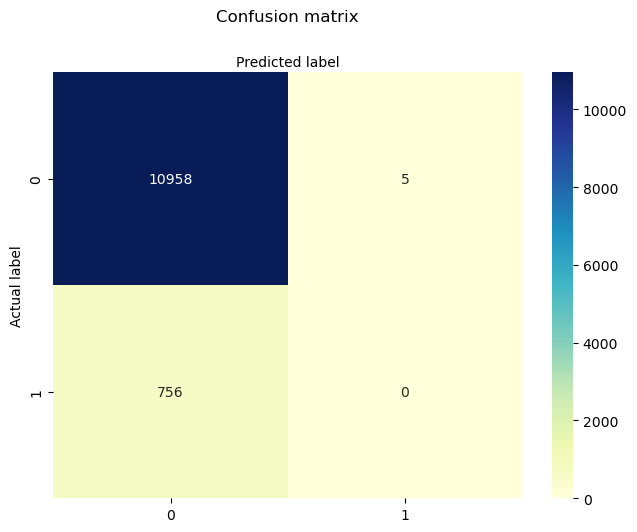

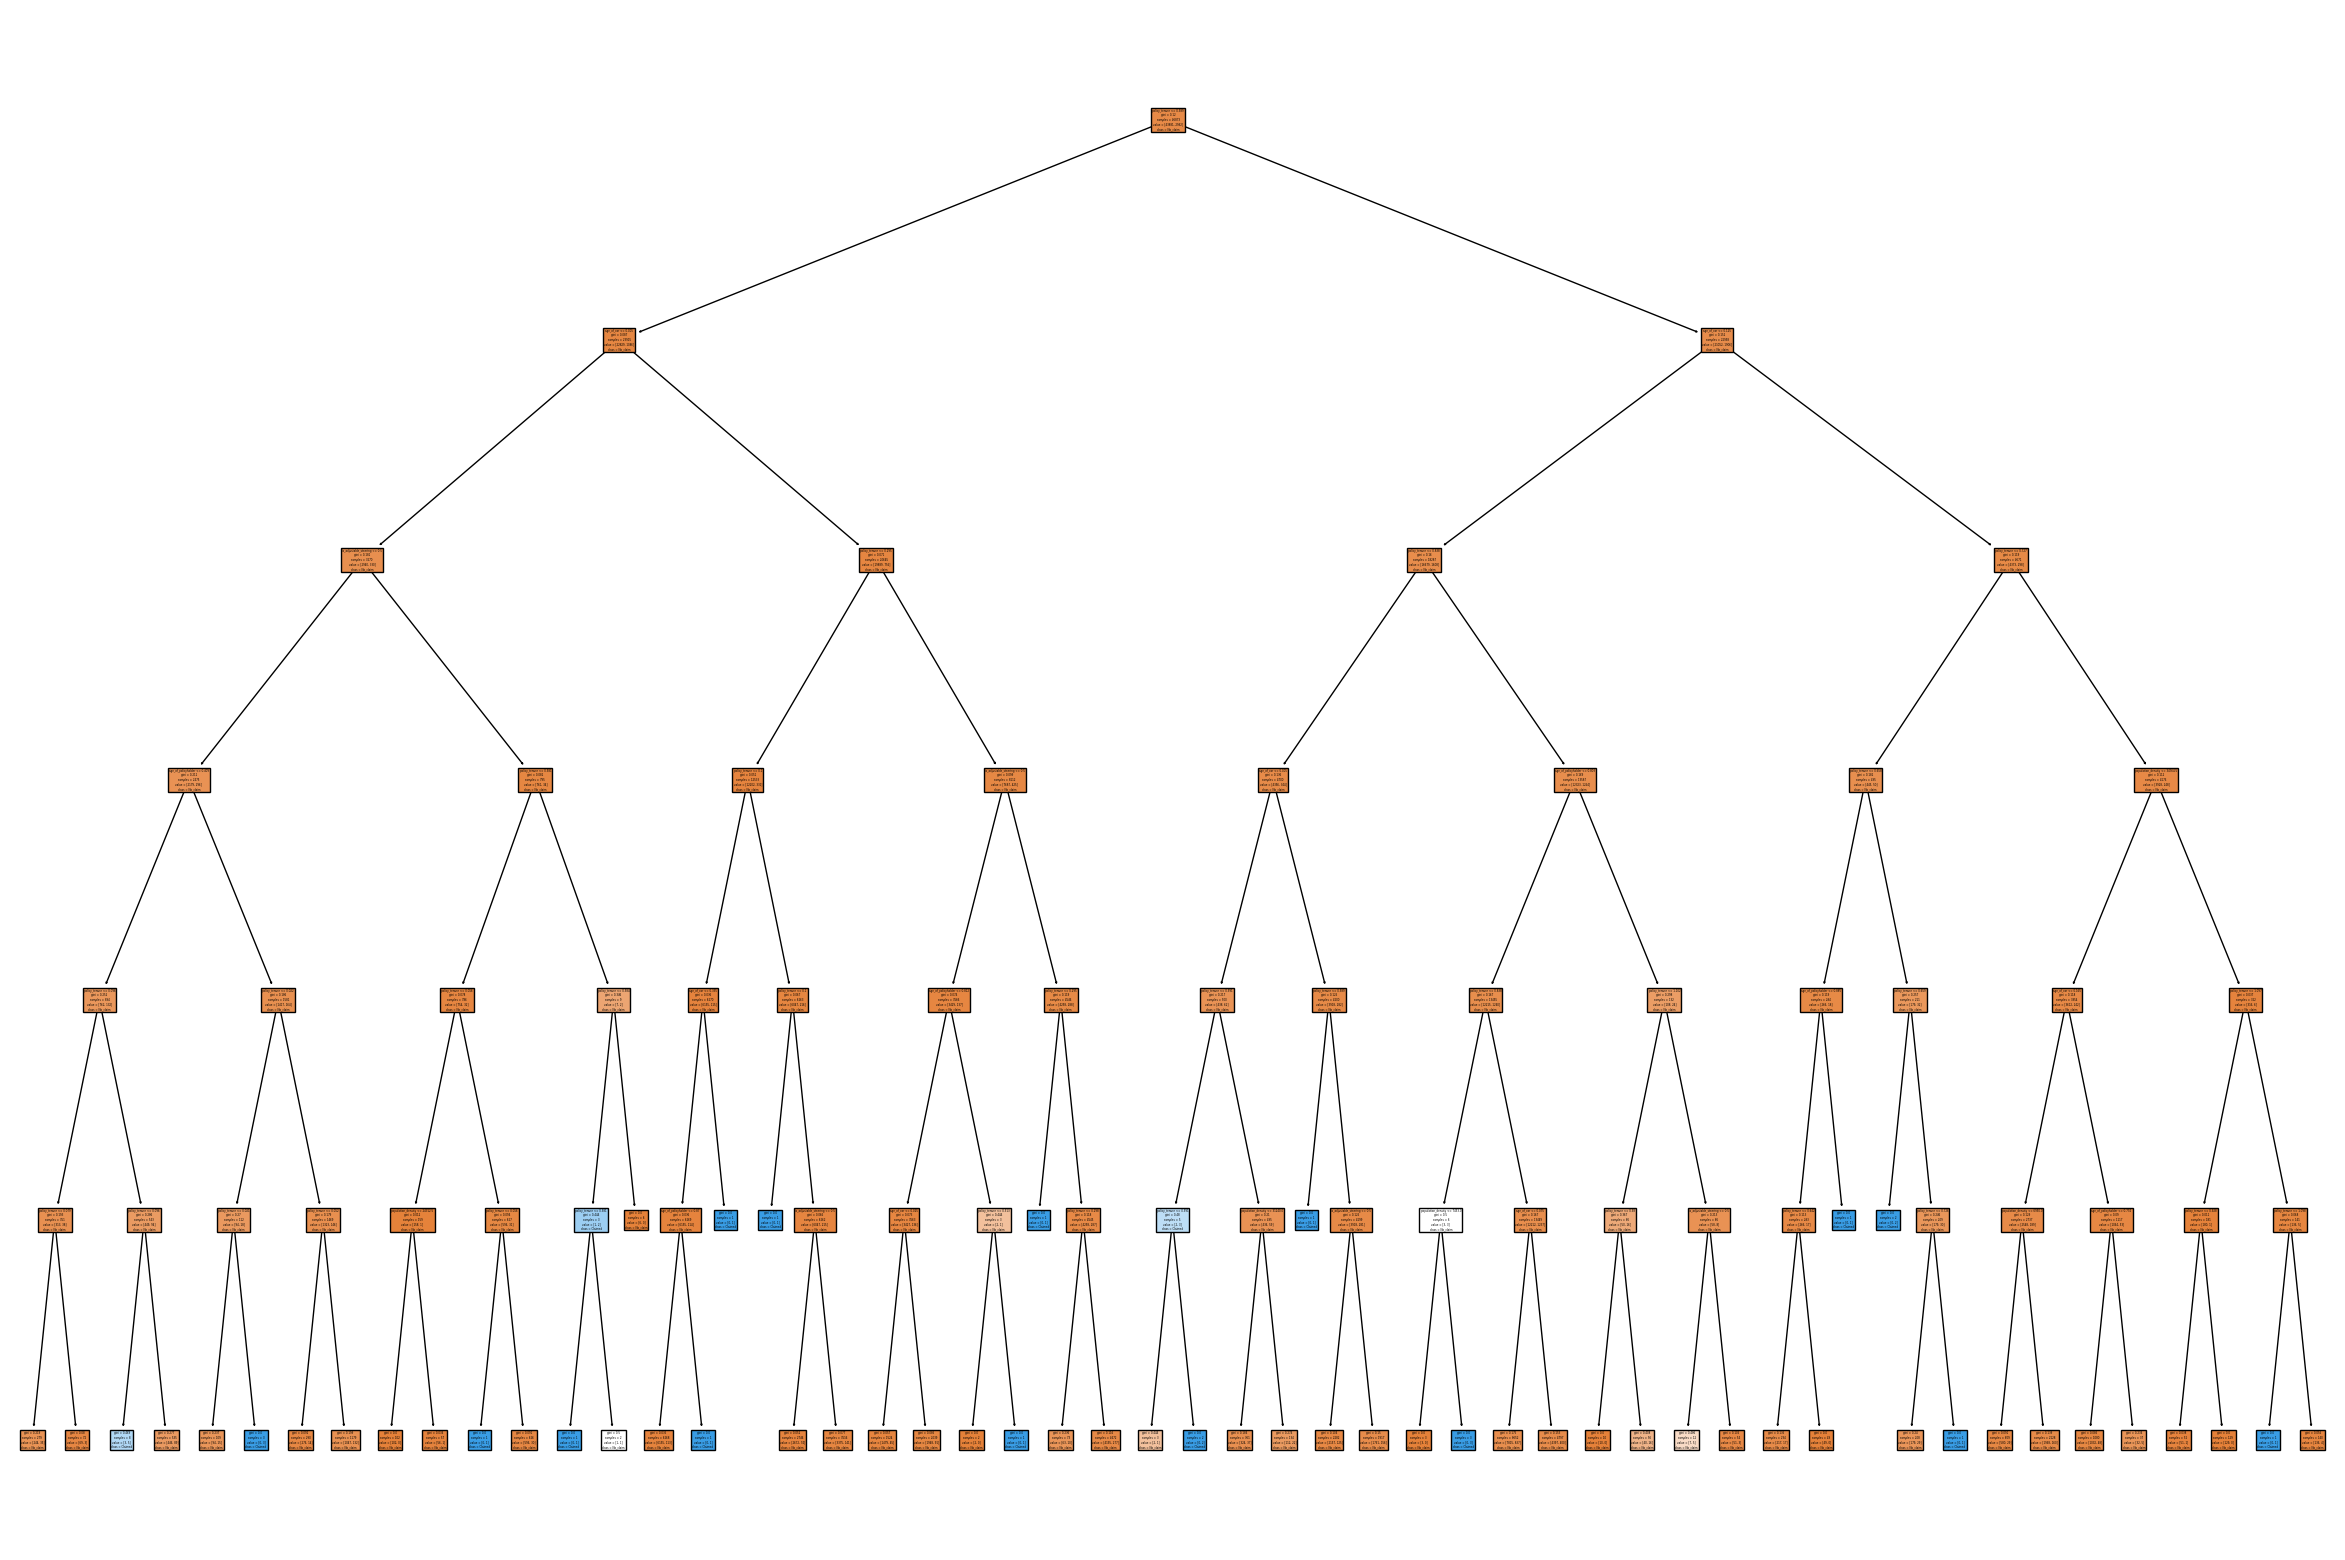

              precision    recall  f1-score   support

    No_claim       0.94      1.00      0.97     10963
     Claimed       0.00      0.00      0.00       756

    accuracy                           0.94     11719
   macro avg       0.47      0.50      0.48     11719
weighted avg       0.88      0.94      0.90     11719



In [66]:
# Decision Tree classification model

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report

#split dataset in features and target variable

X = data[['policy_tenure','age_of_car','age_of_policyholder','population_density','is_adjustable_steering']]# Features
y = data.is_claim # Target variable
features = X.columns

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier
clf = DecisionTreeClassifier(max_depth=6, random_state = 42)
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the recall of the model
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

# Calculate the confusion matrix of the model
cm = confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Visualize the decision tree
plt.figure(figsize=(30, 20))
plot_tree(clf, feature_names= features, class_names=['No_claim','Claimed'], filled=True)
plt.show()

# Print the evaluation matrix
target_names = ['No_claim','Claimed']
print(classification_report(y_test, y_pred, target_names=target_names))

In [69]:
from sklearn.model_selection import GridSearchCV

# Create the decision tree model
model = DecisionTreeClassifier(random_state=42)
# Define the hyperparameters and their possible values
param_grid = {
    'max_depth': range(1, 21)
}

# Create the grid search object
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='f1')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and best score
print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best average F1 score: {grid_search.best_score_:}')

Best hyperparameters: {'max_depth': 20}
Best average F1 score: 0.05157428846671963
